# $d-q$ and $\alpha-\beta$ transformations notebook

## Principle 
Assuming we have a sinusodial voltage/current signal, the $d-q$ transformation will convert the sine-wave to a DC-value with two components, namely a "d" and a "q" component. 
### Step 1 (basics) - convert to $\alpha-\beta$ - space
Convert the AC-signal to new axis, named $\alpha$ and $\beta$, which are orthogonally placed. The $\alpha-\beta$ space is a spacial coordinate system, and does not contain time. Any signal is composed of a component in the $\alpha$ direction ($r_{\alpha}$), and one component in the $\beta$ direction ($r_{\beta}$). This is a vector $\mathbb{R}_{\alpha\beta}=r_{\alpha} + jr_{\beta} = r (\cos(\omega t)+j\sin(\omega t)) = r e^{j\omega t}$. 

### Step 2 (basics) - convert to $d-q$ - space 
The spacial vectors in $\alpha-\beta$ space is rotating in time. Now lets have a coordinate system superimposed on the $\alpha-\beta$ space, but this new coordinate system is rotating with respect to $\alpha-\beta$ with the same speed and direction as the spacial vectors. $\mathbb{R}_{dq} = \mathbb{R}_{\alpha\beta}e^{j\rho}$.

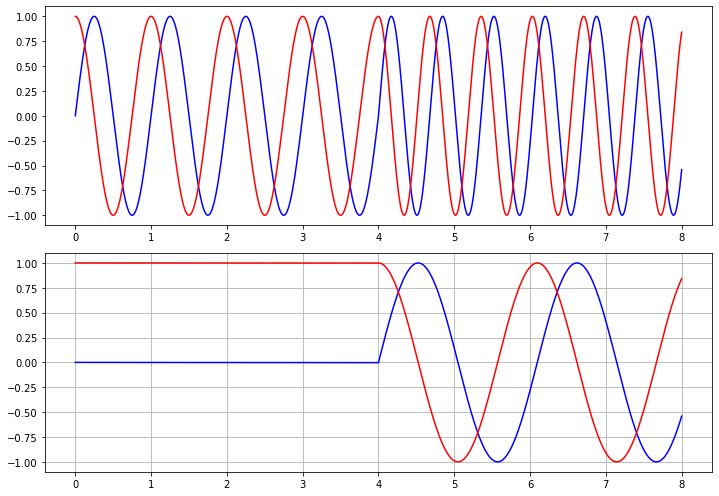

In [33]:
import numpy as np 
import matplotlib.pyplot as plt 

t0 = 0 
t1 = 8
N = 10000 
dt = (t1 - t0)/N
t = np.linspace(t0, t1, N) 

w_start = 2*np.pi
w_disturb = 2*np.pi + 1
w = np.append(w_start*np.ones(N//2), w_disturb*np.ones(N//2)+2)
wt = [w_start*t0]
for w_el in w[1:]: 
    wt.append(wt[-1]+w_el*dt)

R_ab = np.sin(wt) + np.cos(wt)*1j #The alpha-beta signal

phase_shift_rho = 0
rho = w_start*t + phase_shift_rho #All the rho angles
R_dq = R_ab * np.exp(rho*1j)

fig, ax = plt.subplots(2, 1)
ax[0].plot(t, np.real(R_ab), 'b')
ax[0].plot(t, np.imag(R_ab), 'r')

ax[1].plot(t, np.real(R_dq), 'b', label='d-component')
ax[1].plot(t, np.imag(R_dq), 'r', label='q-component')
ax[1].grid()

fig.set_figheight(7) 
fig.set_figwidth(10)
fig.tight_layout()
plt.show() 

## Three-phase transformation 
The $\alpha-\beta$ transformation didn't come out as clear in the previous example. It is much more important in real examples, such as three-phase applications, where the three phases don't mach parallell to the axis. The three phases can be converted to $\alpha\beta$ coordinate system by assuming that the $\alpha$-axis is exacly on the a-phase axis. $\mathbb{R}_{\alpha\beta} = r_{a}e^{j0} + r_{b}e^{j\frac{2\pi}{3}} + r_{c}e^{j\frac{4\pi}{3}}$. Converting this into matrix-form gives: 

### From abc to dq
$$\begin{bmatrix} r_{\alpha} \\ r_{\beta} \end{bmatrix} = \begin{bmatrix} 1 & -0.5 & -0.5 \\ 0 & \frac{\sqrt{3}}{2} & -\frac{\sqrt{3}}{2} \end{bmatrix} \begin{bmatrix} r_{a} \\ r_{b} \\ r_{c} \end{bmatrix}$$ 

$$\begin{bmatrix} r_{d} \\ r_{q} \end{bmatrix} = \begin{bmatrix} \cos{\rho} & \sin{\rho} \\ -\sin{\rho} & \cos{\rho} \end{bmatrix} \begin{bmatrix} r_{\alpha} \\ r_{\beta} \end{bmatrix}$$ 

### From dq to abc
$$\begin{bmatrix} r_{\alpha} \\ r_{\beta} \end{bmatrix} = \begin{bmatrix} \cos{\rho} & -\sin{\rho} \\ \sin{\rho} & \cos{\rho} \end{bmatrix} \begin{bmatrix} r_{d} \\ r_{q} \end{bmatrix}$$ 

$$\begin{bmatrix} r_{a} \\ r_{b} \\ r_{c} \end{bmatrix} = \begin{bmatrix} \frac{2}{3} & 0 \\ -\frac{1}{3} & \frac{\sqrt{3}}{3} \\ -\frac{1}{3} & -\frac{\sqrt{3}}{3} \end{bmatrix} \begin{bmatrix} r_{\alpha} \\ r_{\beta} \end{bmatrix}$$ 